In [1]:
# Decision Trees

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_infy=pd.read_csv("/content/drive/MyDrive/Python Colab Stuff Sem 3/Daily datasets for ML/INFY_day_data.csv")
print(df_infy)

      Unnamed: 0                       date    close     high      low  \
0              0  2015-01-01 00:00:00+05:30   493.60   495.50   489.23   
1              1  2015-01-02 00:00:00+05:30   503.30   504.77   493.00   
2              2  2015-01-05 00:00:00+05:30   498.98   507.50   494.38   
3              3  2015-01-06 00:00:00+05:30   488.55   496.25   483.53   
4              4  2015-01-07 00:00:00+05:30   490.89   493.69   487.50   
...          ...                        ...      ...      ...      ...   
1902        1902  2022-10-17 00:00:00+05:30  1489.95  1495.00  1475.50   
1903        1903  2022-10-18 00:00:00+05:30  1503.70  1510.95  1497.25   
1904        1904  2022-10-19 00:00:00+05:30  1485.45  1504.95  1481.30   
1905        1905  2022-10-20 00:00:00+05:30  1500.90  1504.00  1474.20   
1906        1906  2022-10-21 00:00:00+05:30  1500.50  1506.00  1491.35   

         open   volume  
0      492.24  2002764  
1      493.00  6778320  
2      502.48  9937024  
3      495.

In [5]:
df_infy.head()

,Unnamed: 0,date,close,high,low,open,volume
0,0,2015-01-01 00:00:00+05:30,493.60,495.50,489.23,492.24,2002764
1,1,2015-01-02 00:00:00+05:30,503.30,504.77,493.00,493.00,6778320
2,2,2015-01-05 00:00:00+05:30,498.98,507.50,494.38,502.48,9937024
3,3,2015-01-06 00:00:00+05:30,488.55,496.25,483.53,495.00,9667316
4,4,2015-01-07 00:00:00+05:30,490.89,493.69,487.50,491.25,7249916


In [6]:
df_infy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1907 non-null   int64  
 1   date        1907 non-null   object 
 2   close       1907 non-null   float64
 3   high        1907 non-null   float64
 4   low         1907 non-null   float64
 5   open        1907 non-null   float64
 6   volume      1907 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 104.4+ KB


In [7]:
df_infy.shape

(1907, 7)

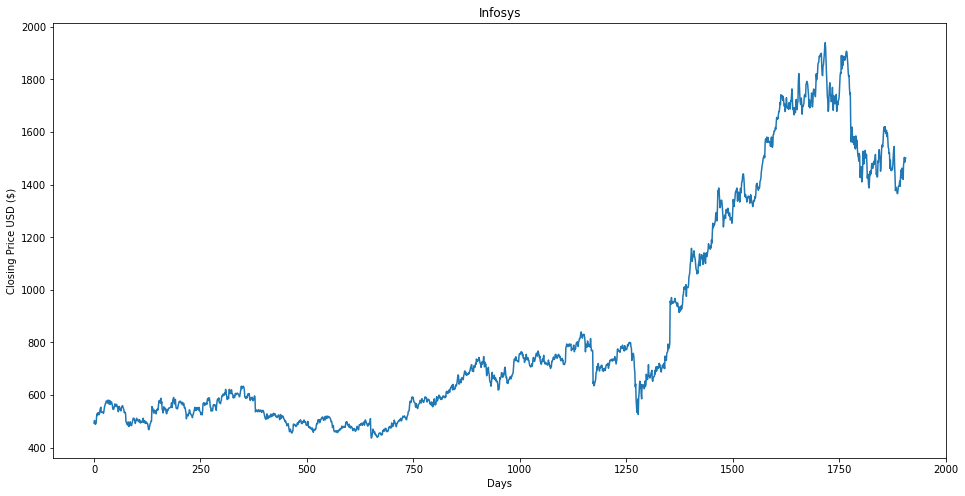

In [8]:
#Closing prices
plt.figure(figsize=(16,8))
plt.title('Infosys')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df_infy['close'])
plt.show()

In [10]:
#Close and prediction
df2_infy = df_infy['close']
df2_infy.head()
df2_infy = pd.DataFrame(df2_infy)  
df2_infy.head()
future_days = 72
df2_infy['Prediction'] = df2_infy['close'].shift(-future_days)
df2_infy.head()
x = np.array(df2_infy.drop(['Prediction'], 1))[:-future_days]
print(x)
y = np.array(df2_infy['Prediction'])[:-future_days]
print(y)

[[ 493.6 ]
 [ 503.3 ]
 [ 498.98]
 ...
 [1475.95]
 [1491.65]
 [1498.7 ]]
[ 535.65  534.43  530.5  ... 1485.45 1500.9  1500.5 ]


<ipython-input-10-d4dc0c7aaa68>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(df2_infy.drop(['Prediction'], 1))[:-future_hours]


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
from sklearn.tree import DecisionTreeRegressor

In [12]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
tree_confidence = tree.score(x_train,y_train)
print("The Score is : ",tree_confidence)

The Score is :  0.997707991056456


In [13]:
x_future = np.array(df2_infy.drop(['Prediction'], 1)) [-future_days:]
print(x_future)

[[1514.45]
 [1473.15]
 [1438.6 ]
 [1444.45]
 [1428.85]
 [1430.35]
 [1489.9 ]
 [1484.15]
 [1515.3 ]
 [1532.9 ]
 [1506.3 ]
 [1503.6 ]
 [1451.15]
 [1471.05]
 [1517.4 ]
 [1549.7 ]
 [1551.05]
 [1543.6 ]
 [1566.1 ]
 [1599.9 ]
 [1616.65]
 [1619.4 ]
 [1602.45]
 [1619.95]
 [1594.1 ]
 [1596.45]
 [1606.25]
 [1582.95]
 [1597.1 ]
 [1575.65]
 [1542.4 ]
 [1537.5 ]
 [1518.15]
 [1521.55]
 [1461.75]
 [1492.95]
 [1464.2 ]
 [1453.  ]
 [1461.3 ]
 [1455.1 ]
 [1457.65]
 [1475.9 ]
 [1511.65]
 [1536.2 ]
 [1544.95]
 [1475.4 ]
 [1432.8 ]
 [1377.05]
 [1390.3 ]
 [1388.55]
 [1377.25]
 [1367.95]
 [1365.45]
 [1380.25]
 [1393.55]
 [1394.7 ]
 [1398.65]
 [1413.45]
 [1393.75]
 [1429.4 ]
 [1455.15]
 [1451.2 ]
 [1462.65]
 [1423.8 ]
 [1428.7 ]
 [1419.9 ]
 [1474.25]
 [1489.95]
 [1503.7 ]
 [1485.45]
 [1500.9 ]
 [1500.5 ]]


<ipython-input-13-cdc55a81680d>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = np.array(df2_infy.drop(['Prediction'], 1)) [-future_hours:]


In [15]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[1367.95 1687.1  1393.55 1763.85 1590.2  1590.2  1521.55 1692.25 1367.95
 1596.45 1388.55 1544.95 1429.4  1461.3  1461.75 1702.5  1702.5  1582.95
 1619.95 1740.15 1780.2  1543.6  1740.15 1543.6  1708.7  1740.15 1733.3
 1602.45 1740.15 1703.9  1582.95 1596.45 1461.75 1377.05 1721.15 1500.9
 1419.9  1451.2  1511.65 1453.   1453.   1485.45 1692.8  1596.45 1728.95
 1485.45 1590.2  1356.35 1695.05 1695.05 1356.35 1571.8  1571.8  1560.4
 1691.9  1691.9  1706.65 1718.45 1691.9  1590.2  1453.   1451.2  1419.9
 1475.9  1590.2  1394.7  1687.1  1521.55 1544.95 1503.7  1678.75 1678.75]


<ipython-input-16-a4eb23516165>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = prediction


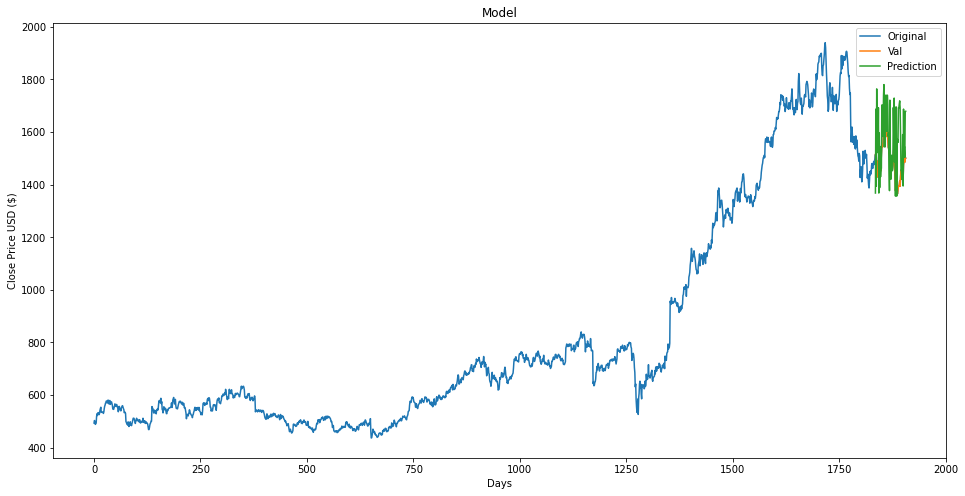

In [16]:
prediction = tree_prediction
valid = df2_infy[x.shape[0]:]
valid['Predictions'] = prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df_infy[ 'close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend (['Original', 'Val', 'Prediction'])
plt.show()

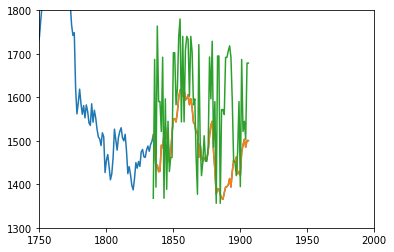

In [17]:
plt.plot(df_infy['close'])
plt.plot(valid[['close', 'Predictions']])
plt.xlim(1750, 2000)
plt.ylim(1300, 1800)
plt.show()